In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('datasets/originals/combined.csv')

X = data[['pressure', 'temperature', 'vibration', 'volume_flow', 'Motor_power']]
y = data[['cooler_condition', 'internal_pump_leakage', 'hydraulic_accumulator', 'stable_flag']]



In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
label_encoders = {}
for col in y_train.columns:
    le = LabelEncoder()
    y_train[col] = le.fit_transform(y_train[col])
    y_test[col] = le.transform(y_test[col])
    label_encoders[col] = le
    
y_train = y_train.values
y_test = y_test.values


In [5]:
ada_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)

multi_model = MultiOutputClassifier(ada_model)

multi_model.fit(X_train_scaled, y_train)


MultiOutputClassifier(estimator=AdaBoostClassifier(learning_rate=0.5,
                                                   n_estimators=100,
                                                   random_state=42))

In [6]:
joblib.dump(multi_model, 'ada_combined_model.pkl')
joblib.dump(scaler, 'scaler_agb.pkl')
for col, le in label_encoders.items():
    joblib.dump(le, f'label_encoder_{col}.pkl')


In [7]:
y_pred = multi_model.predict(X_test_scaled)

y_pred_decoded = pd.DataFrame(y_pred, columns=y.columns)
for col in y.columns:
    y_pred_decoded[col] = label_encoders[col].inverse_transform(y_pred_decoded[col])


Classification Report for cooler_condition:
              precision    recall  f1-score   support

           3       0.99      0.98      0.99       152
          20       0.98      0.99      0.99       135
         100       1.00      1.00      1.00       154

    accuracy                           0.99       441
   macro avg       0.99      0.99      0.99       441
weighted avg       0.99      0.99      0.99       441



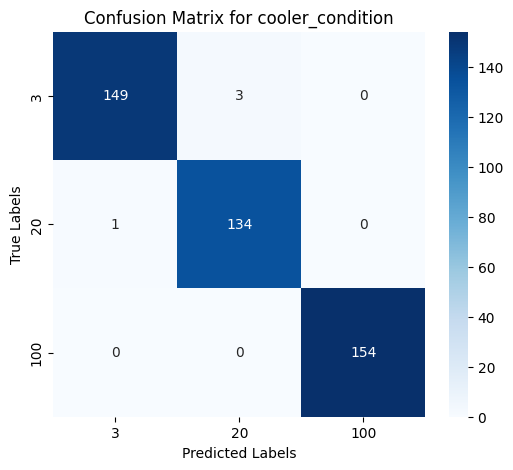

Classification Report for internal_pump_leakage:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       228
           1       0.86      0.85      0.86       101
           2       0.87      0.91      0.89       112

    accuracy                           0.93       441
   macro avg       0.91      0.91      0.91       441
weighted avg       0.94      0.93      0.93       441



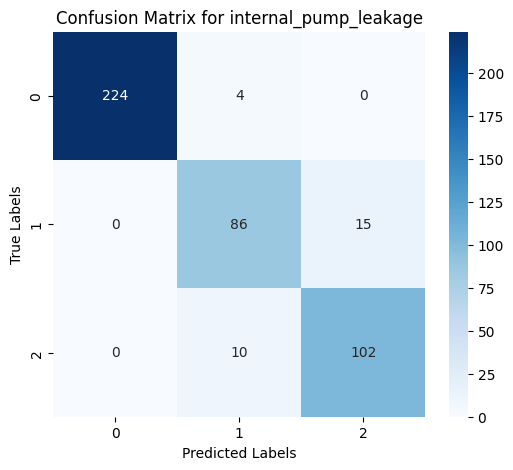

Classification Report for hydraulic_accumulator:
              precision    recall  f1-score   support

          90       0.59      0.74      0.66       152
         100       0.47      0.79      0.59        75
         115       0.61      0.24      0.35        91
         130       0.91      0.66      0.76       123

    accuracy                           0.62       441
   macro avg       0.65      0.61      0.59       441
weighted avg       0.66      0.62      0.61       441



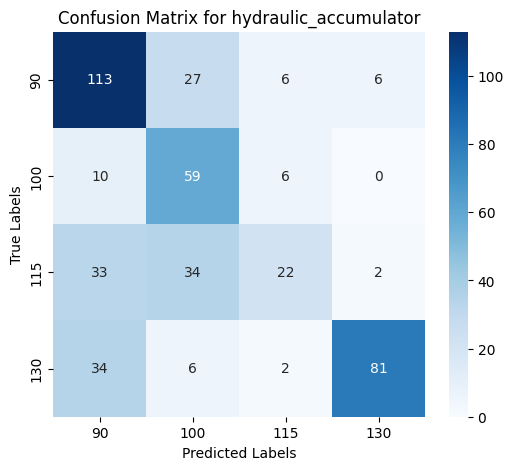

Classification Report for stable_flag:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       294
           1       0.95      0.82      0.88       147

    accuracy                           0.93       441
   macro avg       0.93      0.90      0.91       441
weighted avg       0.93      0.93      0.92       441



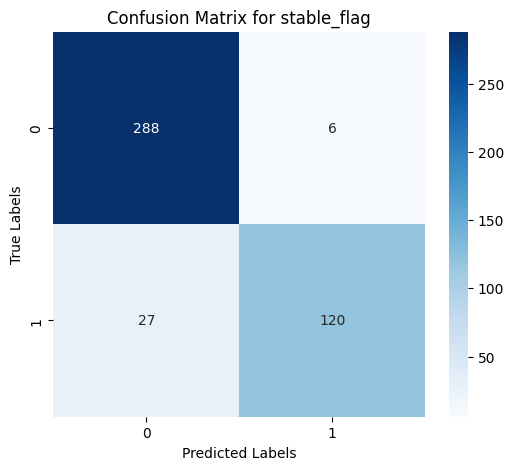

In [9]:
for i, col in enumerate(y.columns):
    print(f"Classification Report for {col}:")
    
    target_names = list(map(str, label_encoders[col].classes_))
    
    print(classification_report(y_test[:, i], y_pred[:, i], target_names=target_names))

    cm = confusion_matrix(y_test[:, i], y_pred[:, i])
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {col}')
    plt.show()


In [10]:
for i, col in enumerate(y.columns):
    print(f"Classification Report for {col}:\n")
    print(classification_report(y_test[:, i], y_pred[:, i]))

overall_accuracy = sum(
    accuracy_score(y_test[:, i], y_pred[:, i]) for i in range(y.shape[1])
) / y.shape[1]
print("Overall Accuracy:", overall_accuracy)

Classification Report for cooler_condition:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       152
           1       0.98      0.99      0.99       135
           2       1.00      1.00      1.00       154

    accuracy                           0.99       441
   macro avg       0.99      0.99      0.99       441
weighted avg       0.99      0.99      0.99       441

Classification Report for internal_pump_leakage:

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       228
           1       0.86      0.85      0.86       101
           2       0.87      0.91      0.89       112

    accuracy                           0.93       441
   macro avg       0.91      0.91      0.91       441
weighted avg       0.94      0.93      0.93       441

Classification Report for hydraulic_accumulator:

              precision    recall  f1-score   support

           0       0.59      0.74     